In [12]:
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt

In [13]:
data =  pd.read_csv('data_employee_clean (2).csv')
data = data[data['Sales (Domestic Ultimate Total USD)'] > 0]
data

,LATITUDE,LONGITUDE,AccountID,Company,SIC Code,Industry,8-Digit SIC Code,8-Digit SIC Description,Year Found,Entity Type,...,Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Import/Export Status,Fiscal Year End,Global Ultimate Company,Global Ultimate Country,Domestic Ultimate Company,Is Domestic Ultimate,Is Global Ultimate
0,1.285495,103.843852,LAKB2BID4559214,FRANK CONSULTING SERVICES PRIVATE LIMITED,7361.0,Employment Agencies,73610000.0,Employment agencies,2020.0,Subsidiary,...,3834.368271,2.209224e+06,4.637871e+06,NaN,NaN,FINDERS HOLDCO LIMITED,United Kingdom,FRANK RECRUITMENT GROUP PRIVATE LTD.,0.0,0.0
1,1.291294,103.827476,LAKB2BID7610849,NEW DESERT ORCHID SHIPPING PTE. LTD.,4449.0,"Water Transportation of Freight, Not Elsewhere...",44490000.0,Water transportation of freight,2015.0,Subsidiary,...,100.000000,7.093536e+09,7.093536e+09,NaN,NaN,PETREDEC PTE. LIMITED,Singapore,NaN,0.0,0.0
2,1.300144,103.857517,LAKB2BID5461679,2MBAO BIOCELLBANK PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",1993.0,Subsidiary,...,4.000000,1.026308e+06,1.026308e+06,NaN,NaN,MADISON LIGHTERS AND WATCHES CO LTD,Hong Kong SAR,2MBAO BIOCELLBANK PTE. LTD.,1.0,0.0
3,1.300785,103.791263,LAKB2BID5088529,NEWBLOOM PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",2006.0,Subsidiary,...,100.000000,7.339898e+10,7.339898e+10,NaN,NaN,WILMAR INTERNATIONAL LIMITED,Singapore,WILMAR INTERNATIONAL LIMITED,0.0,0.0
4,1.298759,103.859430,LAKB2BID1268831,ASIA GREEN CAPITAL PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",2006.0,Parent,...,4.000000,4.322130e+05,4.322130e+05,Exports,NaN,ASIA GREEN CAPITAL PTE. LTD.,Singapore,ASIA GREEN CAPITAL PTE. LTD.,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29177,1.355309,103.887857,LAKB2BID5423564,DYSTAR GLOBAL HOLDINGS (SINGAPORE) PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67199901.0,"Investment holding companies, except banks",2009.0,Subsidiary,...,6615.000000,2.949122e+06,2.943975e+09,NaN,2020-12-31T05:00:00Z,"Zhejiang Longsheng Group Co., Ltd.",China,DYSTAR GLOBAL HOLDINGS (SINGAPORE) PTE. LTD.,1.0,0.0
29178,1.319605,103.898298,LAKB2BID6196188,ORTUS HOLDINGS LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",NaN,Independent,...,4.000000,1.026308e+06,1.026308e+06,NaN,NaN,NaN,NaN,NaN,0.0,0.0
29179,1.316363,103.924303,LAKB2BID6100985,ABRDN ASIA LIMITED,6726.0,"Unit Investment Trusts, Face-Amount Certificat...",67269905.0,"Management investment funds, closed-end",1991.0,Subsidiary,...,25091.052998,2.289731e+08,4.114318e+08,Exports,2021-12-31T05:00:00Z,ABRDN HOLDINGS LIMITED,United Kingdom,ABRDN ASIA LIMITED,1.0,0.0
29180,1.295595,103.858968,LAKB2BID5144338,FANSIPAN HOLDINGS PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",2018.0,Subsidiary,...,4.000000,1.026308e+06,1.026308e+06,NaN,NaN,65EP INVESTMENT I PTE. LTD.,Singapore,65EP INVESTMENT I PTE. LTD.,0.0,0.0


In [15]:
convert = []
for i in range(len(data)):
    entity = data.iloc[i]['Entity Type']
    if entity == 'Subsidiary':
        l = 1
    elif entity == 'Parent':
        l = 2
    elif entity == 'Branch':
        l = 3
    elif entity == 'Independent':
        l = 4
    convert.append(l)
data['entity type conversion'] = convert
data

,LATITUDE,LONGITUDE,AccountID,Company,SIC Code,Industry,8-Digit SIC Code,8-Digit SIC Description,Year Found,Entity Type,...,Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Import/Export Status,Fiscal Year End,Global Ultimate Company,Global Ultimate Country,Domestic Ultimate Company,Is Domestic Ultimate,Is Global Ultimate,entity type conversion
0,1.285495,103.843852,LAKB2BID4559214,FRANK CONSULTING SERVICES PRIVATE LIMITED,7361.0,Employment Agencies,73610000.0,Employment agencies,2020.0,Subsidiary,...,2.209224e+06,4.637871e+06,NaN,NaN,FINDERS HOLDCO LIMITED,United Kingdom,FRANK RECRUITMENT GROUP PRIVATE LTD.,0.0,0.0,1
1,1.291294,103.827476,LAKB2BID7610849,NEW DESERT ORCHID SHIPPING PTE. LTD.,4449.0,"Water Transportation of Freight, Not Elsewhere...",44490000.0,Water transportation of freight,2015.0,Subsidiary,...,7.093536e+09,7.093536e+09,NaN,NaN,PETREDEC PTE. LIMITED,Singapore,NaN,0.0,0.0,1
2,1.300144,103.857517,LAKB2BID5461679,2MBAO BIOCELLBANK PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",1993.0,Subsidiary,...,1.026308e+06,1.026308e+06,NaN,NaN,MADISON LIGHTERS AND WATCHES CO LTD,Hong Kong SAR,2MBAO BIOCELLBANK PTE. LTD.,1.0,0.0,1
3,1.300785,103.791263,LAKB2BID5088529,NEWBLOOM PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",2006.0,Subsidiary,...,7.339898e+10,7.339898e+10,NaN,NaN,WILMAR INTERNATIONAL LIMITED,Singapore,WILMAR INTERNATIONAL LIMITED,0.0,0.0,1
4,1.298759,103.859430,LAKB2BID1268831,ASIA GREEN CAPITAL PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",2006.0,Parent,...,4.322130e+05,4.322130e+05,Exports,NaN,ASIA GREEN CAPITAL PTE. LTD.,Singapore,ASIA GREEN CAPITAL PTE. LTD.,1.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29177,1.355309,103.887857,LAKB2BID5423564,DYSTAR GLOBAL HOLDINGS (SINGAPORE) PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67199901.0,"Investment holding companies, except banks",2009.0,Subsidiary,...,2.949122e+06,2.943975e+09,NaN,2020-12-31T05:00:00Z,"Zhejiang Longsheng Group Co., Ltd.",China,DYSTAR GLOBAL HOLDINGS (SINGAPORE) PTE. LTD.,1.0,0.0,1
29178,1.319605,103.898298,LAKB2BID6196188,ORTUS HOLDINGS LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",NaN,Independent,...,1.026308e+06,1.026308e+06,NaN,NaN,NaN,NaN,NaN,0.0,0.0,4
29179,1.316363,103.924303,LAKB2BID6100985,ABRDN ASIA LIMITED,6726.0,"Unit Investment Trusts, Face-Amount Certificat...",67269905.0,"Management investment funds, closed-end",1991.0,Subsidiary,...,2.289731e+08,4.114318e+08,Exports,2021-12-31T05:00:00Z,ABRDN HOLDINGS LIMITED,United Kingdom,ABRDN ASIA LIMITED,1.0,0.0,1
29180,1.295595,103.858968,LAKB2BID5144338,FANSIPAN HOLDINGS PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",2018.0,Subsidiary,...,1.026308e+06,1.026308e+06,NaN,NaN,65EP INVESTMENT I PTE. LTD.,Singapore,65EP INVESTMENT I PTE. LTD.,0.0,0.0,1


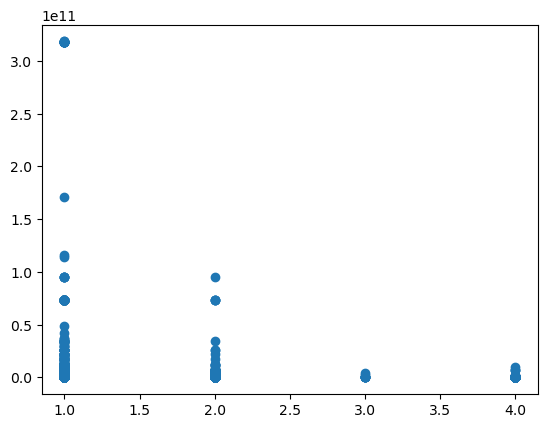

In [16]:
plt.scatter(data['entity type conversion'], data['Sales (Domestic Ultimate Total USD)'])
plt.show()

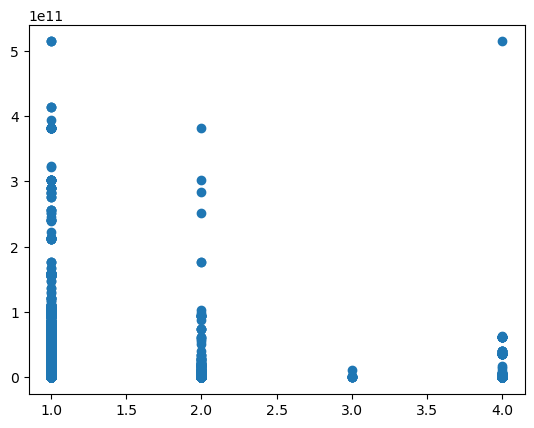

In [17]:
plt.scatter(data['entity type conversion'], data['Sales (Global Ultimate Total USD)'])
plt.show()

In [24]:
entity_type = ['Subsidiary','Parent', 'Branch', 'Independent' ]
t = data[data['Entity Type'] == 'Parent']
t
    

,LATITUDE,LONGITUDE,AccountID,Company,SIC Code,Industry,8-Digit SIC Code,8-Digit SIC Description,Year Found,Entity Type,...,Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Import/Export Status,Fiscal Year End,Global Ultimate Company,Global Ultimate Country,Domestic Ultimate Company,Is Domestic Ultimate,Is Global Ultimate,entity type conversion
4,1.298759,103.859430,LAKB2BID1268831,ASIA GREEN CAPITAL PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",2006.0,Parent,...,432213.0,432213.0,Exports,NaN,ASIA GREEN CAPITAL PTE. LTD.,Singapore,ASIA GREEN CAPITAL PTE. LTD.,1.0,1.0,2
12,1.295595,103.858968,LAKB2BID9992619,TOP AUTOMATION PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",2013.0,Parent,...,1026308.0,1026308.0,NaN,NaN,TOP AUTOMATION PTE. LTD.,Singapore,TOP AUTOMATION PTE. LTD.,1.0,1.0,2
13,1.372102,103.932000,LAKB2BID7192975,REALFOUNDATIONS PTE. LTD.,7379.0,"Computer Related Services, Not Elsewhere Class...",73790000.0,"Computer related services, nec",2010.0,Parent,...,635649.0,635649.0,NaN,NaN,REALFOUNDATIONS PTE. LTD.,Singapore,REALFOUNDATIONS PTE. LTD.,1.0,1.0,2
14,1.312533,103.655380,LAKB2BID8343349,DE ROOTS HOLDING PTE. LTD.,3083.0,"Laminated Plastics Plate, Sheet, and Profile S...",30839902.0,"Plastics finished products, laminated",2008.0,Parent,...,2141640.0,2141640.0,NaN,NaN,DE ROOTS HOLDING PTE. LTD.,Singapore,DE ROOTS HOLDING PTE. LTD.,1.0,1.0,2
16,1.296205,103.843589,LAKB2BID6594395,SINGAPORE HIGHPOLYMER CHEMICAL PRODUCTS PTE LTD,2821.0,"Plastics Materials, Synthetic Resins, and Nonv...",28210104.0,Polyesters,1974.0,Parent,...,18643800.0,18643800.0,Both Imports & Exports,NaN,SINGAPORE HIGHPOLYMER CHEMICAL PRODUCTS PTE LTD,Singapore,SINGAPORE HIGHPOLYMER CHEMICAL PRODUCTS PTE LTD,1.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29162,1.281920,103.819532,LAKB2BID4379368,SING CHYE HENG INVESTMENT HOLDINGS PTE LTD,5137.0,"Women's, Children's, and Infants' Clothing and...",51370200.0,Women's and children's lingerie and undergarments,1975.0,Parent,...,47409000.0,47409000.0,Both Imports & Exports,NaN,SING CHYE HENG INVESTMENT HOLDINGS PTE LTD,Singapore,SING CHYE HENG INVESTMENT HOLDINGS PTE LTD,1.0,1.0,2
29163,1.301897,103.857848,LAKB2BID8478854,SHUNJI MATSUO PTE LTD,7231.0,Beauty Shops,72310000.0,Beauty shops,1998.0,Parent,...,139530.0,139530.0,NaN,NaN,SHUNJI MATSUO PTE LTD,Singapore,SHUNJI MATSUO PTE LTD,1.0,1.0,2
29169,1.387165,103.906534,LAKB2BID4360753,TRANSCEND TECHNOLOGIES (S) PTE. LTD.,5084.0,Industrial Machinery and Equipment,50840000.0,Industrial machinery and equipment,2003.0,Parent,...,2641980.0,2641980.0,NaN,NaN,TRANSCEND TECHNOLOGIES (S) PTE. LTD.,Singapore,TRANSCEND TECHNOLOGIES (S) PTE. LTD.,1.0,1.0,2
29172,1.352457,103.757745,LAKB2BID5317488,SALOBO INVESTMENTS PTE. LTD.,6719.0,"Offices of Holding Companies, Not Elsewhere Cl...",67190000.0,"Holding companies, nec",2019.0,Parent,...,1026308.0,1026308.0,NaN,NaN,SALOBO INVESTMENTS PTE. LTD.,Singapore,SALOBO INVESTMENTS PTE. LTD.,1.0,1.0,2


In [29]:
# Import the necessary libraries
from sklearn.tree import DecisionTreeRegressor
import numpy as np

# Generate some example data
X = np.array(np.log(t['Employees (Single Site)'])).reshape(-1,1)
y = np.log(t['Sales (Domestic Ultimate Total USD)'])

# Create a decision tree regressor
regressor = DecisionTreeRegressor(max_depth=20)  # You can adjust the max_depth parameter

# Fit the model to the data
regressor.fit(X, y)

# Make predictions
X_test = np.arange(0.0, 10.0, 0.01)[:, np.newaxis]
y_pred = regressor.predict(X_test)

# Plot the results
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(X, y, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_pred, color="cornflowerblue", label="prediction")
plt.xlabel("employee")
plt.ylabel("Sales")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

AttributeError: 'Series' object has no attribute 'reshape'

In [28]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Sample data for demonstration
X = np.array(np.log(t['Employees (Single Site)'])).reshape(-1,1)
y = np.log(t['Sales (Domestic Ultimate Total USD)'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth = 50)

# Fit the regressor to the training data
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


Mean Squared Error: 0.12328366623482537
Mean Absolute Error: 0.08213658726350748
